# Load the data

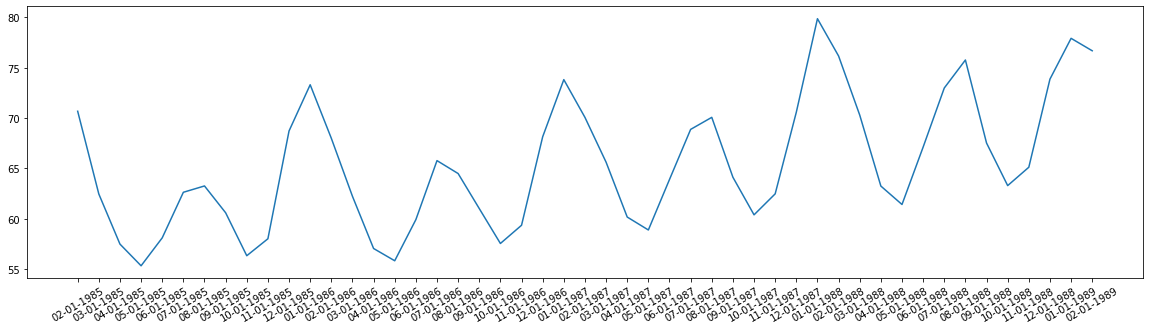

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams["figure.figsize"] = 20,5
df = pd.read_csv("Electric_Production.csv", header=0, index_col=0)
plt.plot(df[1:50]["Value"])
plt.xticks(rotation=30)
plt.show()

In [2]:
df.head()

Value
DATE               
01-01-1985  72.5052
02-01-1985  70.6720
03-01-1985  62.4502
04-01-1985  57.4714
05-01-1985  55.3151

# Moving Average method
**we have seen how to calculate moving average using a window, same applies to our dataset and we will get rolling statistics and find its mean. after the mean, if we plot the graph then you can see the difference in smoothing of a graph as the original**

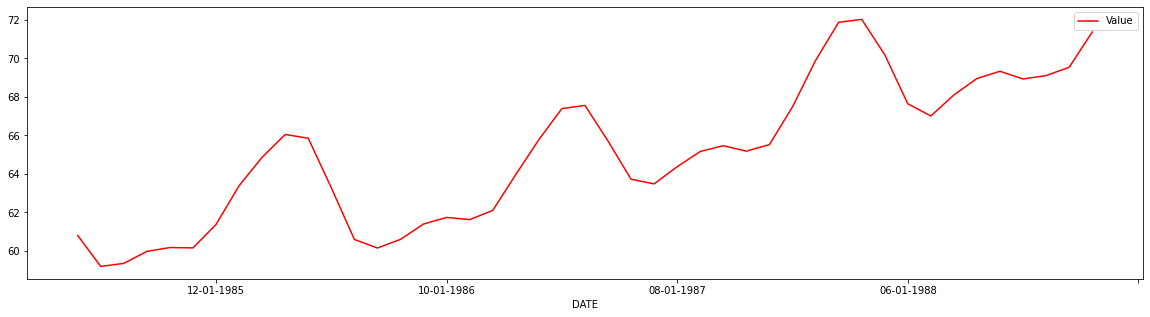

In [3]:
rollingseries = df[1:50].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()

# Simple Exponential Smoothing
**Now as we have seen in simple exponential smoothing has a parameter known as alpha which defines how much weightage we want to give to recent observation. we will fit 2 models, one with high value and one with less value of alpha, and compare both**

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


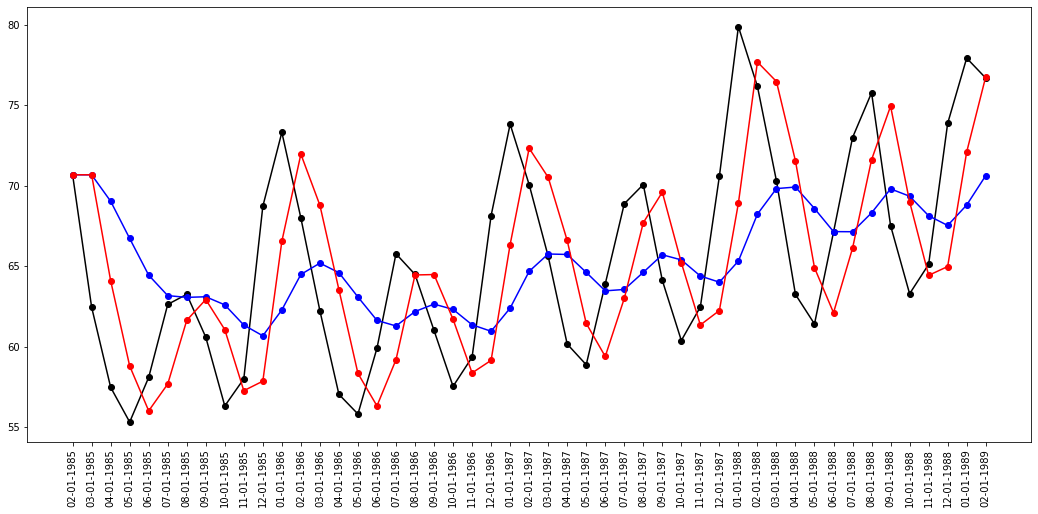

In [4]:
data = df[1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18, 8))
plt.plot(df[1:50], marker='o', color="black")
plt.plot(fit1.fittedvalues, marker="o", color="b")
plt.plot(fit2.fittedvalues, marker="o", color="r")
plt.xticks(rotation="vertical")
plt.show()

# Holt method for exponential smoothing
**Hot’s method is a popular method for exponential smoothing and is also known as Linear exponential smoothing. It forecast the data with the trend. It works on three separate equations that work together to generate the final forecast. let us apply this to our data and experience the changes. In the first fit, we are assuming that there is a linear trend in data, and in the second fitting, we are having exponential smoothing**

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


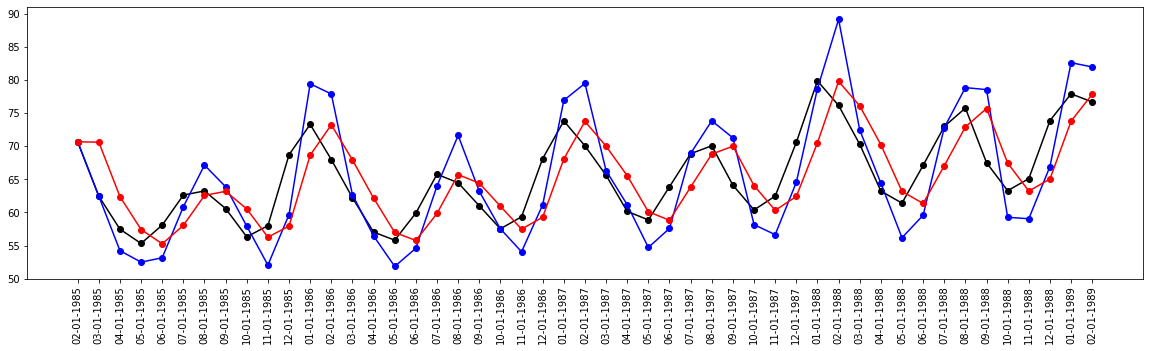

In [5]:
fit1 = Holt(data).fit()  #linear trend
fit2 = Holt(data, exponential=True).fit()  #exponential trend
plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()

You can observe that linear trend means blue plot does not fit fine, and following the original plot whereas red plot is an exponential smoothing plot. This is a simple smoothing with the holt method, we also add parameters like alpha, trend component, seasonality component.

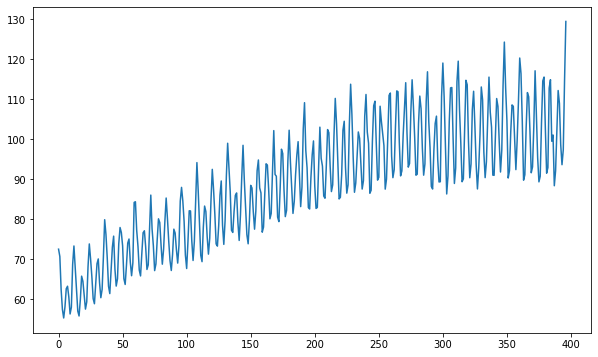

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
DrugSalesData = pd.read_csv("Electric_Production.csv", header=0, index_col=0)
DrugSalesData.reset_index(inplace=True)
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

If you observe the above plot then we can see the upward trend in the data, but we cannot see any kind of special seasonality.

# Now

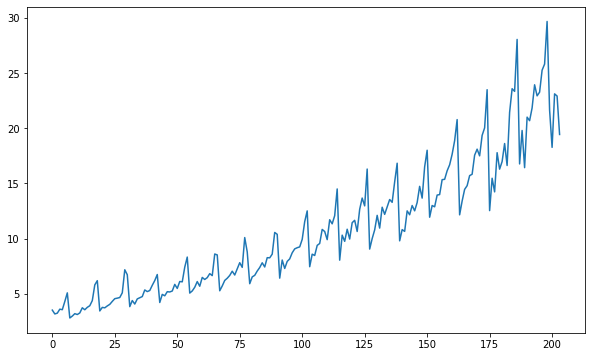

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
DrugSalesData = pd.read_csv('TimeSeries.csv', parse_dates=['Date'], index_col='Date')
DrugSalesData.reset_index(inplace=True)
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

# Decomposition of time-series data
**Now we will decompose time series data into multiplicative and additive and visualize the seasonal and trend components that they have extracted**

In [8]:
# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['Value'], model='additive',period=1)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(DrugSalesData['Value'], model='multiplicative',period=1)

We imported the seasonal decompose function from the stats model and pass both the model as multiplicative and additive. Now let us visualize the result of each model one by one. first plot the results of the Additive time series.

If you observe the plots you will get 4 plots, two for trend, one for seasonality, and one for residual. We can see that trend is of course there using both time methods and seasonality is zero.

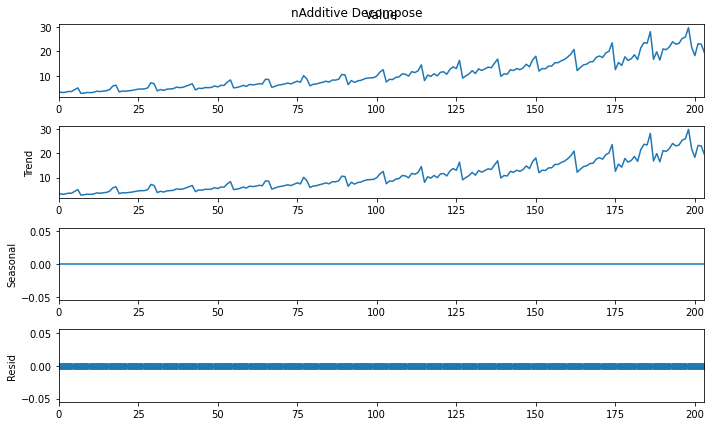

In [9]:
add_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

Now we also want to see the actual value of trend and seasonality, how much it has been calculated. so we will prepare the dataframe of four columns which will have a value for each plot. let us make of additive, and you can try will multiplicative in the same way.

In [10]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

seasoanilty     trend  residual  actual_values
0          0.0  3.526591       0.0       3.526591
1          0.0  3.180891       0.0       3.180891
2          0.0  3.252221       0.0       3.252221
3          0.0  3.611003       0.0       3.611003
4          0.0  3.565869       0.0       3.565869

# ADfuller test for stationary

Stationary is constantly mean and constant variance. Adfuller is a simple test which tells that if the time series is stationary which is a kind of hypothesis testing. The Null hypothesis is time series are non-stationary. If the p-value is less than 5 percent then reject the NULL hypothesis else accept the NULL hypothesis.

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(DrugSalesData.Value.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930674
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


P-value is greater than 5 per cent, which means we cannot build a model on Non-stationary data so we have to make the time series stationary. Now to make time-series stationary there are different methods like autoregression with ACF, PACF, etc which we will cover in the second part of this article.